In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report


In [2]:
data = load_iris()
x = data.data
y = data.target


In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [4]:
logistic = LogisticRegression()


In [5]:
param_grid = {
    'C': np.logspace(-3, 3, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 1500]
}


In [6]:
grid_search = GridSearchCV(logistic, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'max_iter': [1000, 1500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [7]:
print('Best Parameters:', grid_search.best_params_)
best = grid_search.best_estimator_
predictions = best.predict(x_test)


Best Parameters: {'C': np.float64(10.0), 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [8]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



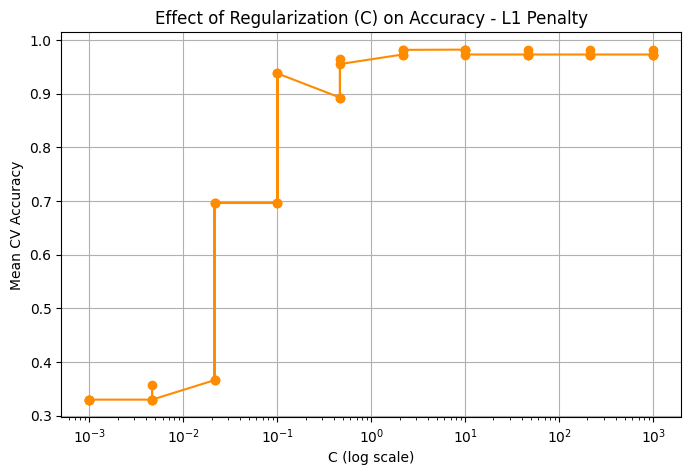

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame(grid_search.cv_results_)

# Filter for L1 penalty only
l1_results = results[results['param_penalty'] == 'l1']

plt.figure(figsize=(8, 5))
plt.semilogx(l1_results['param_C'], l1_results['mean_test_score'], marker='o', color='darkorange')
plt.xlabel('C (log scale)')
plt.ylabel('Mean CV Accuracy')
plt.title('Effect of Regularization (C) on Accuracy - L1 Penalty')
plt.grid(True)
plt.show()
